In [ ]:
!pip install roboflow
from IPython.display import clear_output

from roboflow import Roboflow
rf = Roboflow(api_key="RePUBPx5LhHxQivwRQCq")
project = rf.workspace("roboflow-100").project("vehicles-q0x2v")
dataset = project.version(2).download("yolov8")

clear_output()

In [ ]:
!pip install ultralytics
from IPython.display import clear_output
import ultralytics

clear_output()

In [ ]:
!yolo detect train model=yolov8n.pt data="/content/vehicles-2/data.yaml" epochs=10

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='coco8.yaml', epochs=10, imgsz=640)


100%|██████████| 6.23M/6.23M [00:00<00:00, 72.1MB/s]
Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, for

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!yolo detect predict model="/content/runs/detect/train/weights/last.pt" source="/content/temp.mp4" save=True

In [ ]:
pip install supervision
clear_output()

SyntaxError: ignored


0: 384x640 2 cars, 2 airplanes, 3 trucks, 224.6ms
Speed: 5.0ms preprocess, 224.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/storage/train3
1 label saved to /content/storage/train3/labels


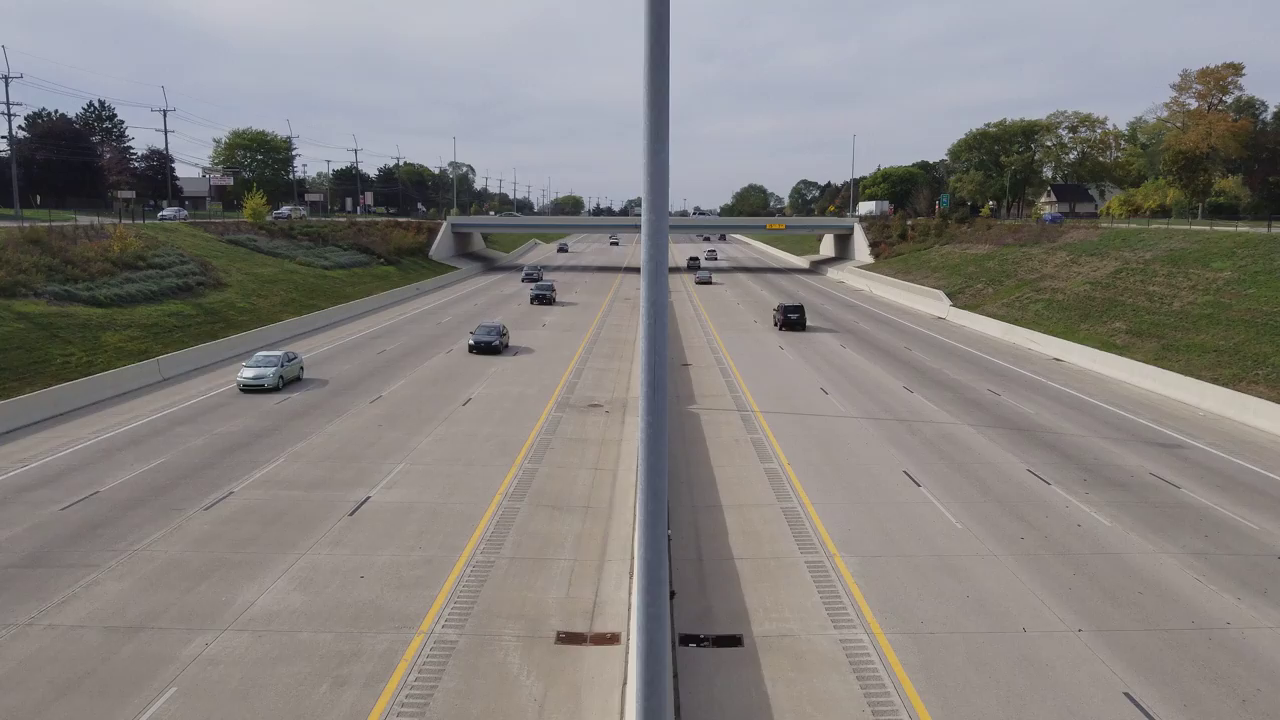

error: ignored

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


cap = cv2.VideoCapture('temp.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, (640, 480))

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Do some processing on the frame here
        results = model.predict(frame,save=True,project = "/content/storage",save_txt = True,show = False)


        out.write(frame)
        cv2_imshow(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
results = model.track(source="https://youtu.be/LNwODJXcvt4", conf=0.3, iou=0.5, save=True)


requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.0s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


requirements: Ultralytics requirements ['pafy', 'youtube_dl==2020.12.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.3s, installed 2 packages: ['pafy', 'youtube_dl==2020.12.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

1/1: https://youtu.be/LNwODJXcvt4... Success ✅ (10842 frames of shape 1920x1080 at 30.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large source

error: ignored

In [ ]:
import cv2
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Process video
cap = cv2.VideoCapture('temp.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
out_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
out_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter('output_video_with_count.mp4', fourcc, fps, (out_width, out_height))

# Iterate through frames
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference
    results = model(frame,classes = [2,3,5,7])

    # Draw bounding boxes
    for box in [b for r in results for b in r.boxes.xyxy]:
        box = box.cpu().numpy().astype(int)
        cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

    # Get the total number of bounding boxes
    total_boxes = len([b for r in results for b in r.boxes.xyxy])

    # Add text on the top of the frame
    cv2.putText(frame, f'Total Cars: {total_boxes}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Write frame to the output video
    output_video.write(frame)

# Release video capture and writer
cap.release()
output_video.release()

# cv2.destroyAllWindows()


Streaming output truncated to the last 5000 lines.
0: 384x640 1 car, 11.0ms
Speed: 2.7ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 9.6ms
Speed: 2.5ms preprocess, 9.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 2.0ms postprocess per imag

In [ ]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou